# Setup

In [69]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from pprint import PrettyPrinter
pp = PrettyPrinter(indent = 3)

In [2]:
data = pd.read_csv('TopCharts_merged.csv', index_col = 0)
#dataset
data.head()

,Artist,Title,Id,Time Signature,Tempo,Key,Mode,Valence,Danceability,Energy,Acousticness,Instrumentalness,Days,Artist Id,Artist Followers,Artist Popularity,Artist Genres
0,Post Malone,rockstar,0e7ipj03S05BNilyu5bRzt,4,159.801,5,0,0.129,0.585,0.520,0.1240,0.000070,116,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
1,Post Malone,I Fall Apart,75ZvA4QfFiZvzhj2xkaWAh,4,143.950,8,0,0.291,0.556,0.538,0.0689,0.000000,756,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
2,Post Malone,Candy Paint,32lItqlMi4LBhb4k0BaSaC,4,180.064,4,1,0.381,0.664,0.667,0.6400,0.000001,496,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
3,Post Malone,Congratulations,3a1lNhkSLSkpJE4MSHpDu9,4,123.146,6,1,0.492,0.630,0.804,0.2150,0.000000,702,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
4,Post Malone,Go Flex,5yuShbu70mtHXY0yLzCQLQ,4,81.967,5,1,0.127,0.665,0.498,0.2280,0.000000,178,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap


In [5]:
df = data.copy()

In [6]:
y = df["Days"]
df.drop(columns = "Days", inplace = True)

In [7]:
d = ["Artist", "Title", "Id", "Artist Id", "Artist Genres"]
df.drop(columns = d, inplace = True)

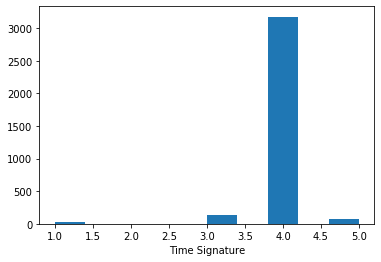

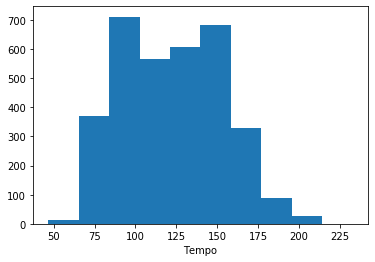

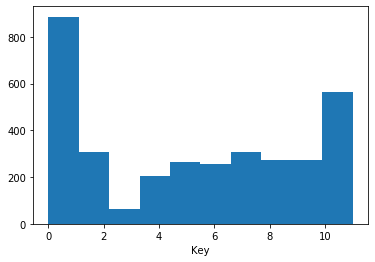

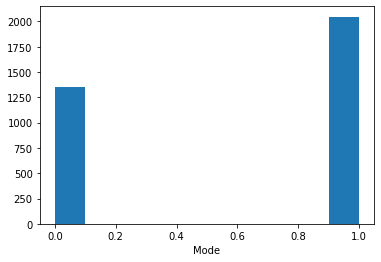

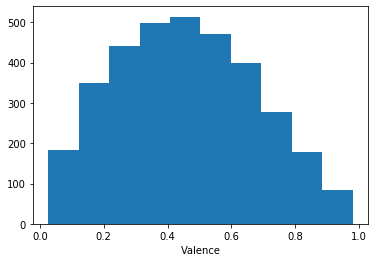

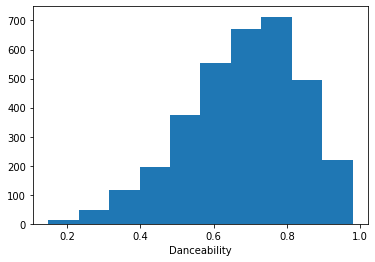

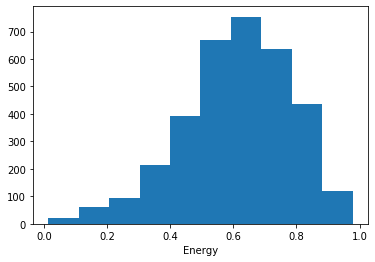

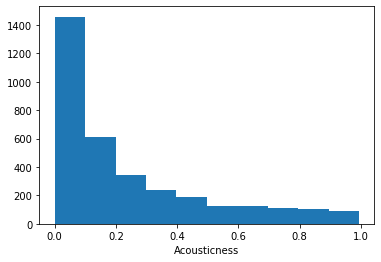

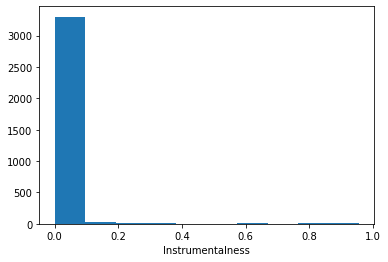

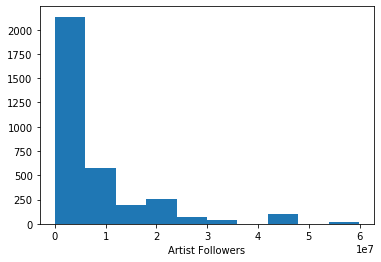

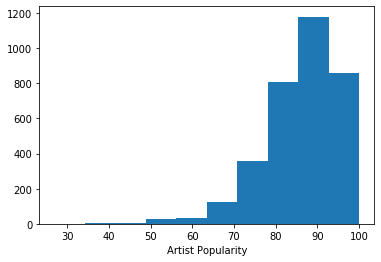

In [8]:
for col in df.columns:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.show()

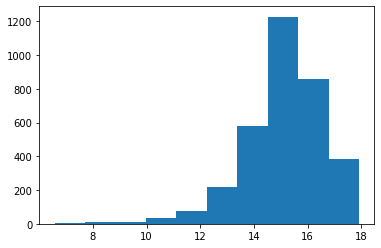

In [71]:
plt.hist(np.log(df["Artist Followers"]))
plt.show()

In [10]:
#can probably drop time sig and inst
df.drop(columns = ["Time Signature", "Instrumentalness"], inplace = True)

## Convert factor variables

In [11]:
categorical = ["Key", "Mode"]

In [12]:
df_dummy = df.copy()
for c in categorical:
    dummy = pd.get_dummies(df[c], prefix = c)
    df_dummy = pd.concat([df_dummy, dummy], axis = 1)    
df_dummy.drop(columns = categorical, inplace = True)

In [13]:
df_dummy.head()

,Tempo,Valence,Danceability,Energy,Acousticness,Artist Followers,Artist Popularity,Key_0,Key_1,Key_2,...,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11,Mode_0,Mode_1
0,159.801,0.129,0.585,0.520,0.1240,22726049.0,98.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,143.950,0.291,0.556,0.538,0.0689,22726049.0,98.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,180.064,0.381,0.664,0.667,0.6400,22726049.0,98.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,123.146,0.492,0.630,0.804,0.2150,22726049.0,98.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,81.967,0.127,0.665,0.498,0.2280,22726049.0,98.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


## log-transform response variable

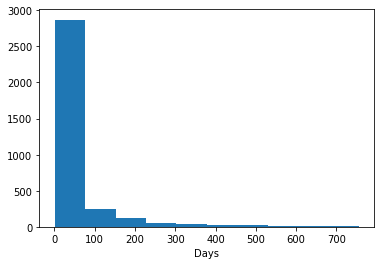

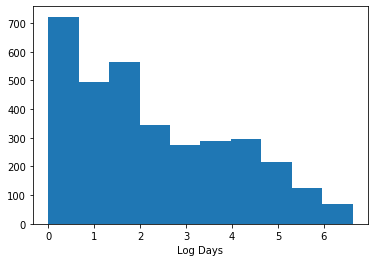

In [14]:
plt.hist(y)
plt.xlabel("Days")
plt.show()

plt.hist(np.log(y))
plt.xlabel("Log Days")
plt.show()

## Split train/test data

In [15]:
from sklearn.model_selection import train_test_split 

In [16]:
y = np.log(y)

In [17]:
X = df_dummy.copy()

In [18]:
X.head()

,Tempo,Valence,Danceability,Energy,Acousticness,Artist Followers,Artist Popularity,Key_0,Key_1,Key_2,...,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11,Mode_0,Mode_1
0,159.801,0.129,0.585,0.520,0.1240,22726049.0,98.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,143.950,0.291,0.556,0.538,0.0689,22726049.0,98.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,180.064,0.381,0.664,0.667,0.6400,22726049.0,98.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,123.146,0.492,0.630,0.804,0.2150,22726049.0,98.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,81.967,0.127,0.665,0.498,0.2280,22726049.0,98.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Functions to evaluate model

In [20]:
from sklearn import metrics 

In [65]:
def evalModel(model, X_test = X_test, y_test = y_test, exp = True):
    y_pred = model.predict(X_test)
    if exp:
        y_pred_exp = np.exp(y_pred)
        y_test_exp = np.exp(y_test)
    
    scores = []
    for fn in [metrics.max_error, metrics.mean_absolute_error, metrics.median_absolute_error]:
        scores.append(fn(y_test_exp, y_pred_exp))
    
    plt.hist(y_test_exp - y_pred_exp)
    plt.xlabel("Actual - Predicted")
    plt.show()
    return dict(zip(["max_error", "Mean AE", "Median AE"], scores))     

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [23]:
med_scorer = metrics.make_scorer(metrics.median_absolute_error, False)

In [24]:
def gridsearch(model, hyperparams, X_train, y_train, random = False, n_iter = 100):
    if random:
        gs = RandomizedSearchCV(estimator = model, param_distributions = hyperparams, \
                              n_iter = n_iter, scoring = med_scorer, verbose=3, n_jobs = -1).fit(X_train, y_train)
    else:
        gs = GridSearchCV(estimator = model, verbose = 3, scoring = med_scorer, n_jobs = -1, param_grid = hyperparams).fit(X_train, y_train)
    return {"model": gs.best_estimator_, "params": gs.best_params_}

# Regression Models

## Unrestricted linear regression (baseline model)

In [25]:
from sklearn.linear_model import LinearRegression

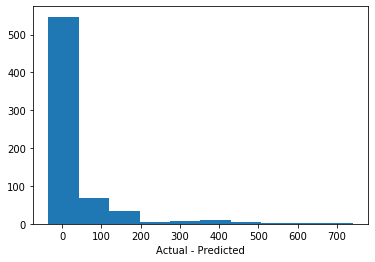

Initial model:
{'max_error': 740.0965550922439, 'Mean AE': 39.68150948497189, 'Median AE': 8.371096740259446}


In [82]:
regressor = LinearRegression().fit(X_train, y_train)
print(f"Initial model:\n{evalModel(regressor, X_test, y_test)}")

## Lasso

In [47]:
from sklearn.linear_model import Lasso

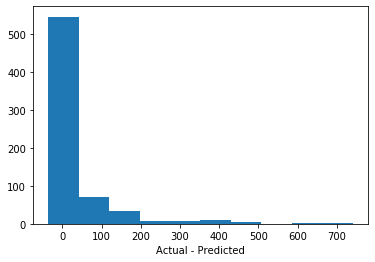

Initial model:
{'max_error': 740.2885213079109, 'Mean AE': 39.76895758185482, 'Median AE': 7.422451570140884}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


Cross-validated params:
{'alpha': 10})


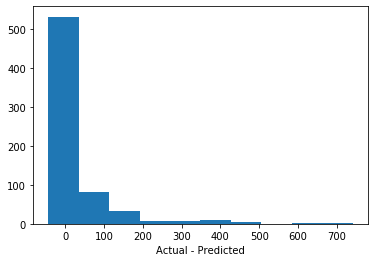

Optimized model:
{'max_error': 740.974982835269, 'Mean AE': 39.880074394954036, 'Median AE': 7.328471929013465}


In [119]:
lasso = Lasso().fit(X_train, y_train)
print(f"Initial model:\n{evalModel(lasso, X_test, y_test)}")
params = {"alpha":np.arange(1, 11,1)}
cv = gridsearch(Lasso(), params, X_train, y_train)
print(f"Cross-validated params:\n{cv['params']})")
print(f"Optimized model:\n{evalModel(cv['model'],X_test, y_test)}")

## ElasticNet

In [50]:
from sklearn.linear_model import ElasticNet

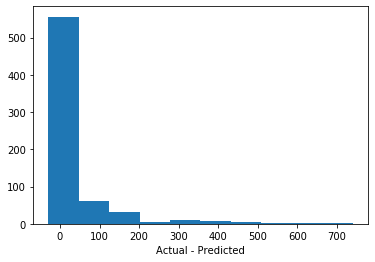

Initial model:
{'max_error': 739.4820993756477, 'Mean AE': 39.68110243847324, 'Median AE': 7.591949561976471}
Fitting 5 folds for each of 220 candidates, totalling 1100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s


Cross-validated params:
{'alpha': 10.5, 'l1_ratio': 1.0})


[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    4.3s finished


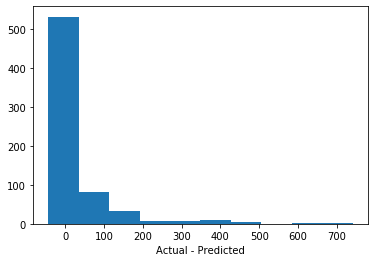

Optimized mode:
{'max_error': 740.9749839603925, 'Mean AE': 39.88007427686447, 'Median AE': 7.328471985203879}


In [74]:
en = ElasticNet().fit(X_train, y_train)
print(f"Initial model:\n{evalModel(en, X_test, y_test)}")
params = {"alpha":np.arange(1, 11, .5), "l1_ratio":np.arange(0,1.1,.1)}
cv = gridsearch(ElasticNet(), params, X_train, y_train)
print(f"Cross-validated params:\n{cv['params']})")
print(f"Optimized model:\n{evalModel(cv['model'],X_test, y_test)}")

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

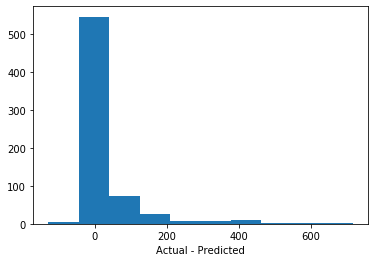

Initial model:
{'max_error': 715.5398678464173, 'Mean AE': 39.114089032377045, 'Median AE': 9.002634358098113}
Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.0min finished


Cross-validated params:
{'max_depth': 90, 'max_leaf_nodes': 80})


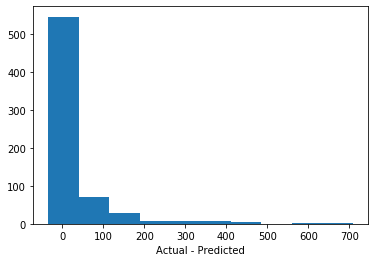

Optimized model:
{'max_error': 708.2568790963475, 'Mean AE': 38.381951295041475, 'Median AE': 7.655793611136456}


In [83]:
rf = RandomForestRegressor(n_jobs = -1).fit(X_train, y_train)
print(f"Initial model:\n{evalModel(rf, X_test, y_test)}")
params = {"max_depth":np.arange(10,100,10), "max_leaf_nodes":np.arange(10, 100, 10)}
cv = gridsearch(RandomForestRegressor(), params, X_train, y_train)
print(f"Cross-validated params:\n{cv['params']})")
print(f"Optimized model:\n{evalModel(cv['model'],X_test, y_test)}")

## Extreme Gradient Boosted Regression

In [78]:
from xgboost import XGBRegressor

#### Tree-based booster

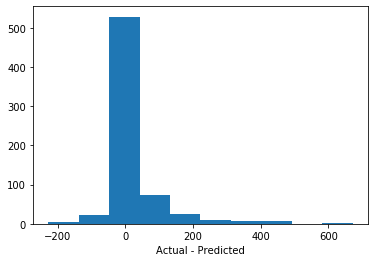

Initial model:
{'max_error': 671.5322451591494, 'Mean AE': 41.807417789802834, 'Median AE': 11.105975151062012}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.0min finished


Cross-validated params:
{'lamda': 5, 'gamma': 1, 'eta': 0.1, 'booster': 'gbtree', 'alpha': 6})


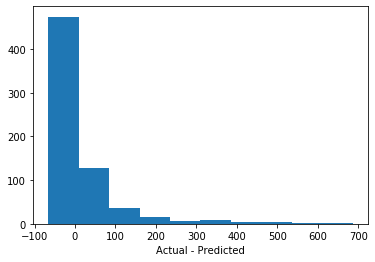

Optimized model:
{'max_error': 686.0163650512698, 'Mean AE': 38.320915248639444, 'Median AE': 8.230231761932373}


In [89]:
xgbr = XGBRegressor().fit(X_train, y_train)
print(f"Initial model:\n{evalModel(xgbr, X_test, y_test)}")
params = {"booster":["gbtree"], "eta":[.1], "gamma":[1], "lamda":np.arange(1, 11, 1), "alpha":np.arange(0, 11, 1)}
cv = gridsearch(XGBRegressor(), params, X_train, y_train, random = True)
print(f"Cross-validated params:\n{cv['params']})")
print(f"Optimized model:\n{evalModel(cv['model'],X_test, y_test)}")

#### DART based booster

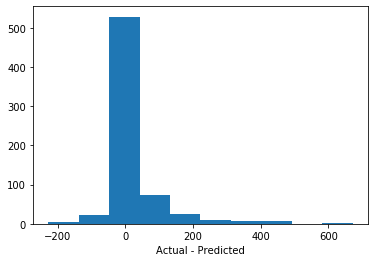

Initial model:
{'max_error': 671.5322442054751, 'Mean AE': 41.8074166329468, 'Median AE': 11.105981349945068}
Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\Users\chris\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 7 is smaller than n_iter=100. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   16.2s finished


Cross-validated params:
{'rate_drop': 0.1, 'booster': 'dart'})


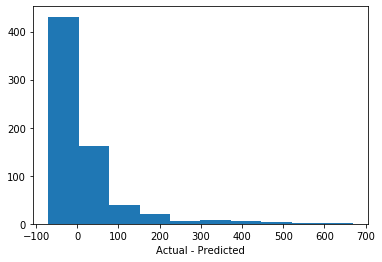

Optimized model:
{'max_error': 668.4980087280276, 'Mean AE': 38.635896189949094, 'Median AE': 8.750585556030273}


In [94]:
xgbr = XGBRegressor(booster = "dart").fit(X_train, y_train)
print(f"Initial model:\n{evalModel(xgbr, X_test, y_test)}")
params = {"booster":["dart"], "rate_drop":np.arange(0,.7,.1)}
cv = gridsearch(XGBRegressor(), params, X_train, y_train, random = True)
print(f"Cross-validated params:\n{cv['params']})")
print(f"Optimized model:\n{evalModel(cv['model'],X_test, y_test)}")

#### Linear based booster

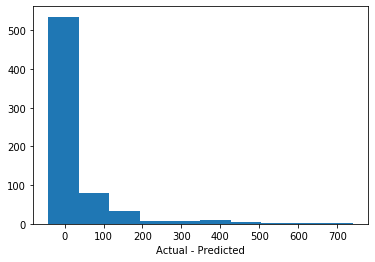

Initial model:
{'max_error': 739.8511447906496, 'Mean AE': 39.80216282956741, 'Median AE': 8.196436882019043}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   30.9s finished


Cross-validated params:
{'lambda': 0, 'booster': 'gblinear', 'alpha': 9})


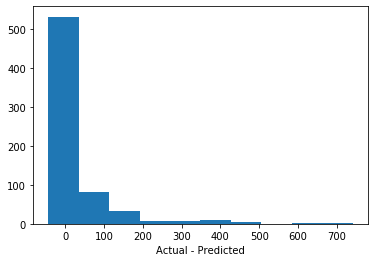

Optimized model:
{'max_error': 740.9749803543093, 'Mean AE': 39.8800746791503, 'Median AE': 7.328470230102539}


In [98]:
xgbr = XGBRegressor(booster = "gblinear").fit(X_train, y_train)
print(f"Initial model:\n{evalModel(xgbr, X_test, y_test)}")
params = {"booster":["gblinear"], "lambda":np.arange(0,10,1), "alpha":np.arange(0,10,1)}
cv = gridsearch(XGBRegressor(), params, X_train, y_train, random = True)
print(f"Cross-validated params:\n{cv['params']})")
print(f"Optimized model:\n{evalModel(cv['model'],X_test, y_test)}")

## Adaptive Boosting Regression

In [84]:
from sklearn.ensemble import AdaBoostRegressor

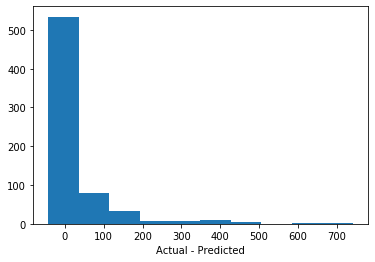

Initial model:
{'max_error': 740.6573634106735, 'Mean AE': 40.000918878133106, 'Median AE': 8.072385503251507}
Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\chris\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.7s


Cross-validated params:
{'n_estimators': 1, 'loss': 'exponential'})


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.7s finished


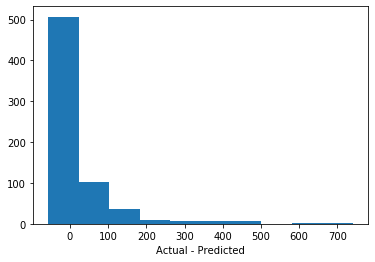

Optimized model:
{'max_error': 740.285302681716, 'Mean AE': 39.9889044870274, 'Median AE': 7.020684686506345}


In [124]:
abr = AdaBoostRegressor(base_estimator = Lasso(alpha = 10)).fit(X_train, y_train)
print(f"Initial model:\n{evalModel(abr, X_test, y_test)}")
params = {"n_estimators":np.arange(1,100,10), "loss":["linear", "square", "exponential"]}
cv = gridsearch(AdaBoostRegressor(base_estimator = Lasso(alpha = 10)), params, X_train, y_train, random = True)
print(f"Cross-validated params:\n{cv['params']})")
print(f"Optimized model:\n{evalModel(cv['model'],X_test, y_test)}")

In [109]:
abr.feature_importances_

array([0.02920473, 0.04532903, 0.20556194, 0.0640536 , 0.04895823,
       0.22524836, 0.34220947, 0.        , 0.        , 0.        ,
       0.00906255, 0.00677246, 0.        , 0.        , 0.0121576 ,
       0.00161342, 0.00440176, 0.        , 0.00542684, 0.        ,
       0.        ])

In [108]:
X_train.columns[np.where(abr.feature_importances_ != 0)[0]]

Index(['Tempo', 'Valence', 'Danceability', 'Energy', 'Acousticness',
       'Artist Followers', 'Artist Popularity', 'Key_3', 'Key_4', 'Key_7',
       'Key_8', 'Key_9', 'Key_11'],
      dtype='object')